# **Sentiment Analysis of Lithuanian literature**

**Tool :** Self-made, `Spacy` based sentiment analyser

**Case :** Vincas Mykolaitis - Putinas, "Altorių šešėly" 

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.ndimage.filters import gaussian_filter1d

from sentiment import SentimentAnalyser

### Data loading and cleaning 

In [2]:
with open("vincas-mykolaitis-putinas-altoriu-sesely.content.txt") as file :
    raw_text = file.read()

In [3]:
raw_text = raw_text.replace("\xa0" , " ")
text = [i for i in raw_text.split("\n") if len(i) > 250 ]

### Sentiment Analysis 

In [4]:
sa = SentimentAnalyser()

In [5]:
sents = [ sa.sentiment( i ) for i in tqdm(text) ]

100%|██████████| 2059/2059 [00:38<00:00, 53.14it/s]


In [6]:
sums = [i["sum"] for i in sents]
means = [i["mean"] for i in sents ]
scores = [i["score"] for i in sents ]

In [7]:
df = pd.DataFrame()
df["text"] = text
df["sums"] = sums
df["means"] = means
df["scores"] = scores

#df["index"] = list(df.index)

print(df.shape)
df.head()

(2059, 4)


,text,sums,means,scores
0,Didžiausias V. Mykolaičio-Putino kūrinys – psi...,0,0.000000,0.000000
1,Po ilgų svyravimų šių knygų autorius pagaliau ...,0,0.000000,0.000000
2,Šitas autoriaus nusistatymas dar labiau stiprė...,-1,-0.025000,-0.075000
3,Šių knygų autoriui jau nuo daugelio metų ypati...,1,0.090909,0.090909
4,"Be to, ir grynai meniški sumetimai palenkė aut...",5,0.357143,1.785714


### Checking face-validity - vieweing paragrpahs with the most positive and most negavive santiments 

In [8]:
# Positive
df2 = df.sort_values("scores" , axis = 0 , ascending = False)

print("#1")
print(text[list(df2.index)[0]])
print("#2")
print(text[list(df2.index)[1]])
print("#3")
print(text[list(df2.index)[3]])

#1
Jis pamatė liekną aukštą ponią, už Liucę didesnę, o turbūt ir gražesnę. Ji žengė lengvai, grakščiai, išdidžiai pakėlusi galvą, bet truputį šypsodamasi. Jos plaukai buvo įmantriai sušukuoti ir suvingiuoti, o ausyse karojo brangūs pašveitalai, kurie ją labai puošė. Jos tamsus rūbas neturėjo jokių ypatingų pagražinimų, bet buvo puošnus ir elegantiškas.
#2
Nespėjo jiedu pasikeisti keliais sakiniais, jau prieškambary subirzgė skambutis, ir trys karininkai, zirzėdami pentinais, pasirodė tarpdury. Šitie, matyt, jau buvo geri ponios Liucijos pažįstami. Visi jie puikiai atrodė, galantiškai sveikinosi, linkėjo linksmų Velykų, o pradėję ragauti gėrimus ir užkandžius, mokėjo girti šeimininkę ir kalbėti jai komplimentus. Ponia Liucija atgijo ir palinksmėjo. Vasaris matė, kad šitie vizitininkai jai vaišinti smagu ir malonu. Netrukus jis atsisveikino.
#3
— Aš manau, — pradėjo jis, — kad bus geriau, jei mes dar valandėlę papasninkausim ir pirmiausia atliksim programinę šio vakaro dalį. Mano mieli s

In [9]:
# Positive
df3 = df.sort_values("scores" , axis = 0 , ascending = True)

print("#1")
print(text[list(df3.index)[0]])
print("#2")
print(text[list(df3.index)[1]])
print("#3")
print(text[list(df3.index)[3]])

#1
Tėvas Severinas nuleidęs galvą klausė tų žodžių, ir, matyt, sunkios mintys jį slėgė. Tylėjo abudu. Buvo jau beveik visai tamsu. Vasaris įžiebė elektrą, ir žiauri šviesa, ūmai užliejusi visą kambarį, išblaškė tą sunkų susikaupimą, kuris laikė apgaubęs šeimininką ir jo rūstų svečią.
#2
Ir jis atsiminė visus seminarijoj girdėtus įspėjimus prieš blogų ir pavojingų knygų skaitymą. Bet kartu jam buvo skaudu tos pažinties ir tų knygų išsižadėti. Jis vėl jautėsi išskirtas ir nuskriaustas, — pasmerktas visą gyvenimą vartyti brevijoriaus lapus, dvasiškus skaitymus ir rūsčios moralės išrašytus traktatus. Sutarta su baroniene savaitė pasibaigė, o jis į dvarą nenuėjo.
#3
Neaprašinėsiu, kokių atgarsių tas žingsnis sukėlė visuomenėje, kokį įspūdį padarė mano šeimai — tėvams, broliams, seserims ir giminėms, — ir kiek sielvarto man dėl to teko išgyventi. Tai būtų per daug asmeniški, nors smalsiam skaitytojui gal ir įdomūs atsiminimai. Tačiau vargu ar jie turėtų platesnės, bendrinamosios reikšmės, o 

### Overall - is the tone of the book positive or negative?

In [10]:
sum(df["sums"])/len(df)

0.5478387566779991

Overall, the tone of the book is mildly positive.

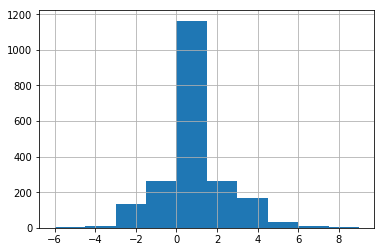

In [11]:
df["sums"].hist(bins=10)

Overwhelming majority of paragraphs are very slightly nuanced with most paragrpahs scoring around `0`.

### How does the sentimnet dynamic unfold through the book?

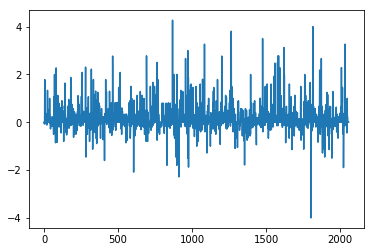

In [12]:
df4=df["scores"]
df4.plot.line()

Since sentimnets are detected at a paragrpah level, the data is very granular and requires additional processing become insightful.

In this case we will do this by smoothing the sentiment data using a `1-dimensional gaussian filter` from `scipy` library. 

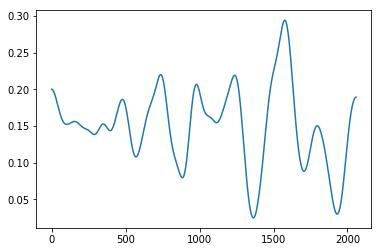

In [13]:
sent_smoothed = list(gaussian_filter1d(list(df["scores"]), sigma=40))
plt.plot(list(df.index), sent_smoothed)

Using smoothed sentimnet, it is also possible to identify most positive and negative passages in the book (opposed to the individual paragrpahs).

In [14]:
#Extracting the most positive passage

d = {index:item for index, item in enumerate(sent_smoothed)}
s = sorted( d.items(), key = lambda kv:kv[1] , reverse = True)

indexes = sorted([i[0] for i in s[0:30]])
print(indexes)
for i in indexes :
    print(i)
    print( text[i] )

[1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590]
1561
Antra gera ponios Liucijos vyro savybė — tai kad jis nebuvo pavydus, nes juk nereta vyrų, kurie ir nemylėdami sekioja savo žmonas kaip koki cerberiai. Lengva numanyti, kad aplink gražią, puošnią, turtingą ir įdomią nepaslankaus biznieriaus žmoną tuoj susidarė visas ratas adoratorių. Nuėjus į balių, vos tik Glaudžiai įžengdavo pro duris, jau rūbinėj prisiplakdavo koks nors majoras, direktorius, partijos lyderis arba kitas koks žymus, galantiškas, dar neseno amžiaus ponas — ir tai dar ne vienas. Lydimi daugelio smalsių akių, jie eidavo į jaukų bufeto kampelį arba į kokį kinų, japonų ar indų stiliaus kambarį, kur vyras, užsakęs ko nors pavalgyt ir išgert, jau likdavo sėdėt visą vakarą, o žmona su palydovais fokstrotuodavo ir valsuodavo, tik protarpiais prisėsdama atsigaivinti vyno stiklu.
1562
Geri pažįsta

In [15]:
# Extracting two most negative passages

s2 = sorted( d.items(), key = lambda kv:kv[1] , reverse = False)
indexes = sorted([i[0] for i in s2[0:50]])
print(indexes)
for i in indexes :
    print(i)
    print( text[i] )

[1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938]
1348
Bet štai stotis, kuri dar gyviau sujaudina Vasario dvasią. Nedidelė geležinkelio stotis, iš kurios jis lygiai prieš 10 metų išvažiavo į tolimą Rusiją ir į platųjį pasaulį. Tuomet čia buvo didžiulis žmonių knibždėlynas. Visi keliai buvo užgrūsti Pėsčių, raitų ir važiuotų. Vargais negalais įsigrūdo jis tada, vieno karininko užtariamas, į vagono platformą ir paliko Lietuvą štai ligi šios dienos. Viskas dabar atgyja jo sujaudintoj vaizduotėj.
1349
O antai kelias į Kalnynus. Už penketo mylių ir dabar tebestovi bažnytkaimis ir dvaras. Vasaris dabar vėl gyvena tą klaikų įspūdį, kai nuo kalnelio pamatė griūvantį bažnyčios bokštą, kai nuo trenksmo sudrebėjo žemė. Dvaras su parku ir gražiais rūm


This reveals that that the lowest point in the book is the culmiantion of the protagonist's conflict between his calling as a prist and a poet. 
The highest point is when protagonist resolves the conflict and meets his future wife. 
The second dip is when the protagonist's chilhood friend,Liucė, dies. 

This is consistent with the expectations. 

**Summary**

Appears that the sentiment analyser works and can be used to provide a new vantage point to analyse literature. 